In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_multilabel_classification

In [3]:
X, Y = make_multilabel_classification(n_samples=200, n_features=2, n_classes=3, n_labels=1, length=50, 
                                      allow_unlabeled=False, sparse=False, return_indicator='dense', 
                                      return_distributions=False, random_state=0)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [6]:
colors = ['#F07818', '#45CCA1', '#89AFD3']
sizes = [40, 120, 240]

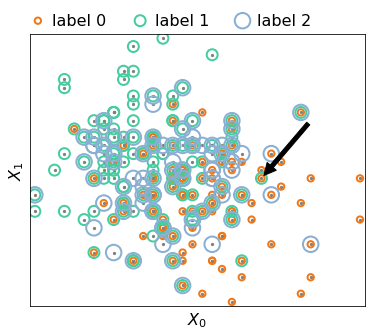

In [7]:
pidx = 145
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X[np.where(Y[:, i]), 0], X[np.where(Y[:, i]), 1], s=sizes[i], edgecolors=colors[i],
                facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/dataset_sample.png', format='png', bbox_inches='tight')

In [8]:
np.where((X[:,0] > 28) &(X[:,0] < 32) & (X[:,1] > 27) &(X[:,1] < 30))

(array([ 33, 145]),)

In [22]:
# Union

In [23]:
k = 20 #int(np.round(np.sqrt(len(X))))
kf, kl = k//2, k//2

In [24]:
fldist = squareform(pdist(np.concatenate((X, Y), axis=1), 'euclidean'))[pidx]

In [25]:
flnn = np.argsort(fldist)[:k]
X_flnn = X[flnn]
Y_flnn = Y[flnn]

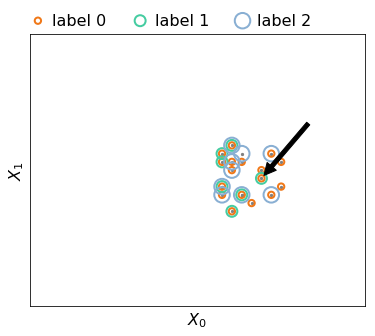

In [26]:
pidx = 145
plt.figure(figsize=(6,5))
plt.scatter(X_flnn[:, 0], X_flnn[:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X_flnn[np.where(Y_flnn[:, i]), 0], X_flnn[np.where(Y_flnn[:, i]), 1], s=sizes[i], edgecolors=colors[i],
                facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/union_features_labels_real_neigh.png', format='png', bbox_inches='tight')

In [27]:
n_size = 200
synthetic_instances = list()
for i in np.arange(0, 2):
    values = X_flnn[:, i]
    mu = np.mean(values)
    sigma = np.std(values)
    new_values = np.random.normal(mu, sigma, n_size)
    synthetic_instances.append(new_values)

In [28]:
X_sn = np.asarray(synthetic_instances).reshape(200, 2)

In [18]:
Y_sn = clf.predict(X_sn)

In [19]:
sel = np.sum(Y_sn, axis=1) > 0

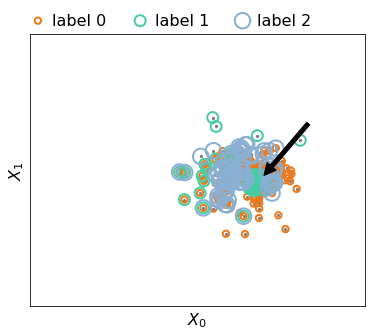

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(X_sn[sel][:, 0], X_sn[sel][:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X_sn[sel][np.where(Y_sn[sel][:, i]), 0], X_sn[sel][np.where(Y_sn[sel][:, i]), 1], s=sizes[i], edgecolors=colors[i],
                facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/union_synthetic_neigh.png', format='png', bbox_inches='tight')

In [21]:
fdist = squareform(pdist(X, 'euclidean'))[pidx]

In [389]:
fnn = np.argsort(fdist)[:kf]
X_fnn = X[fnn]
Y_fnn = Y[fnn]

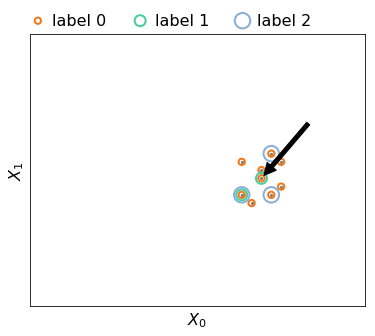

In [390]:
plt.figure(figsize=(6,5))
plt.scatter(X_fnn[:, 0], X_fnn[:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X_fnn[np.where(Y_fnn[:, i]), 0], X_fnn[np.where(Y_fnn[:, i]), 1], 
                s=sizes[i], edgecolors=colors[i], facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/mixed_features_real_neigh.png', format='png', bbox_inches='tight')

In [350]:
ldist = squareform(pdist(Y, 'hamming'))[pidx]

In [392]:
lnn = np.argsort(ldist)[:k]
X_lnn = X[lnn]
Y_lnn = Y[lnn]

squareform(pdist(X_lnn, 'euclidean'))
idx_pidx_in_lnn = np.where((X_lnn[:,0] == X[pidx][0]) & (X_lnn[:,1] == X[pidx][1]))[0][0]

lnn = np.argsort(squareform(pdist(X_lnn, 'euclidean'))[idx_pidx_in_lnn])[:kl]
X_lnn = X_lnn[lnn1]
Y_lnn = Y_lnn[lnn1]

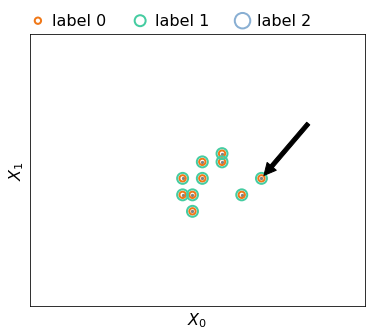

In [393]:
plt.figure(figsize=(6,5))
plt.scatter(X_lnn[:, 0], X_lnn[:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X_lnn[np.where(Y_lnn[:, i]), 0], X_lnn[np.where(Y_lnn[:, i]), 1], 
                s=sizes[i], edgecolors=colors[i], facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/mixed_labels_real_neigh.png', format='png', bbox_inches='tight')

In [394]:
idx_pidx_in_lnn = np.where((X_lnn[:,0] == X[pidx][0]) & (X_lnn[:,1] == X[pidx][1]))[0][0]

In [395]:
kf, kl = k//2, k//2

In [396]:
fnn1 = np.argsort(fdist)[:kf]
X_fnn1 = X[fnn]
Y_fnn1 = Y[fnn]

squareform(pdist(X_lnn, 'euclidean'))

lnn1 = np.argsort(squareform(pdist(X_lnn, 'euclidean'))[idx_pidx_in_lnn])[:kl]
X_lnn1 = X_lnn[lnn1]
Y_lnn1 = Y_lnn[lnn1]

In [397]:
X_rn = np.concatenate((X_fnn1, X_lnn1))
Y_rn = np.concatenate((Y_fnn1, Y_lnn1))

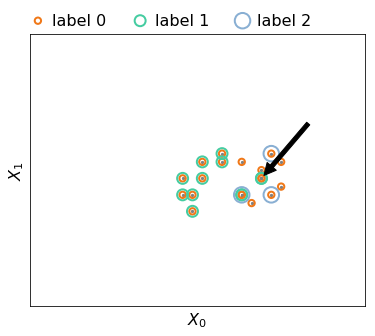

In [398]:
plt.figure(figsize=(6,5))
plt.scatter(X_rn[:, 0], X_rn[:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
#plt.scatter(X_fnn1[:, 0], X_fnn1[:, 1], s=5, c='gray')
for i in range(0, 3):
    plt.scatter(X_rn[np.where(Y_rn[:, i]), 0], X_rn[np.where(Y_rn[:, i]), 1], 
                s=sizes[i], edgecolors=colors[i], facecolors='none', linewidths=2, label='label %d' % i)
    #plt.scatter(X_fnn1[np.where(Y_fnn1[:, i]), 0], X_fnn1[np.where(Y_fnn1[:, i]), 1], 
    #            s=sizes[i], edgecolors=colors[i], facecolors='none', linewidths=2)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/mixed_real_neigh.png', format='png', bbox_inches='tight')

In [399]:
n_size = 200
synthetic_instances = list()
for i in np.arange(0, 2):
    values = X_rn[:, i]
    mu = np.mean(values)
    sigma = np.std(values)
    new_values = np.random.normal(mu, sigma, n_size)
    synthetic_instances.append(new_values)

In [400]:
X_sn = np.asarray(synthetic_instances).reshape(200, 2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [402]:
Y_sn = clf.predict(X_sn)

In [403]:
sel = np.sum(Y_sn, axis=1) > 0

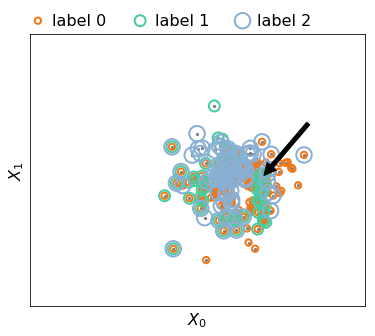

In [404]:
plt.figure(figsize=(6,5))
plt.scatter(X_sn[sel][:, 0], X_sn[sel][:, 1], s=5, c='gray') #, edgecolors=(0, 0, 0))
for i in range(0, 3):
    plt.scatter(X_sn[sel][np.where(Y_sn[sel][:, i]), 0], X_sn[sel][np.where(Y_sn[sel][:, i]), 1], s=sizes[i], edgecolors=colors[i],
                facecolors='none', linewidths=2, label='label %d' % i)

plt.annotate("", xy=(X[pidx][0], X[pidx][1]), xytext=(35, 35), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel(r'$X_0$', fontsize=16)
plt.ylabel(r'$X_1$', fontsize=16)
plt.legend(loc=(0,1), fontsize=16, ncol=3, labelspacing=0, handlelength=0.2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('../fig/mixed_synthetic_neigh.png', format='png', bbox_inches='tight')